In [1]:
import math
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [17]:
"""Intro to Rebound"""

"""Question 2"""

sim = rb.Simulation()

sim.move_to_com()
sim.integrator = "whfast"

sim.add(m=1, hash="Binary 1")
sim.add(m=1, a=1, e= 0.1, hash="Binary 2", f=np.random.rand()*2*np.pi)
sim.add(a=2.5, e= 0.4, hash="Test Planet", f=np.random.rand()*2*np.pi)

spec_int = np.pi # half of one full orbit

N_orbit = 6*np.pi #3 full orbits

sim.integrate(N_orbit, exact_finish_time=0) #setting flag to integrate up to timestep nearest to endtime
sim.dt = 1e-3

sim.exit_max_distance = 4*1

In [19]:
sim.status()

---------------------------------
REBOUND version:     	3.17.0
REBOUND built on:    	May 29 2021 20:46:07
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.8850000000001419e+01
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f98c3c1db40, m=1.0 x=-12.827704927963095 y=2.303931076104272 z=0.0 vx=-0.5421206269995489 vy=0.7224775730778352 vz=0.0>
<rebound.particle.Particle object at 0x7f98c3c1dac0, m=1.0 x=-13.893241669666049 y=2.56289325947754 z=0.0 vx=-0.8777839225573012 vy=-0.5165229947873122 vz=0.0>
<rebound.particle.Particle object at 0x7f98c3c1db40, m=0.0 x=-14.997362762541245 y=3.2918664408276106 z=0.0 vx=-0.9110417833788305 vy=-0.8953508425426512 vz=0.0>
---------------------------------


In [21]:
"""Question 3"""

sim2 = rb.Simulation()

sim2.move_to_com()
sim2.integrator = "whfast"

sim2.add(m=1, hash="Binary 1")
sim2.add(m=1, hash="Binary 2", a=1, e=0.5)
sim2.add(hash="Planet", a=4, e=0)

N2_orbit = 10*2*np.pi
sim2.dt = 1e-3

In [22]:
sim2.status()

---------------------------------
REBOUND version:     	3.17.0
REBOUND built on:    	May 29 2021 20:46:07
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f98c3c1dac0, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f98c3c1db40, m=1.0 x=0.5 y=0.0 z=0.0 vx=0.0 vy=2.449489742783178 vz=0.0>
<rebound.particle.Particle object at 0x7f98c3c1dac0, m=0.0 x=4.25 y=0.0 z=0.0 vx=0.0 vy=1.9318516525781364 vz=0.0>
---------------------------------


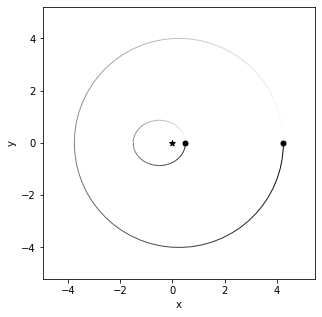

In [23]:
%matplotlib inline

fig = rb.OrbitPlot(sim2)
plt.savefig('orbitalplot.pdf')

Text(0.5, 1.0, 'Manual Orbital Plot')

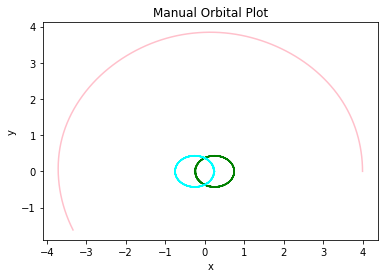

In [24]:
particles2 = sim2.particles
fig, ax = plt.subplots()
ax.plot()

torb = 6*np.pi
Noutputs = 100
times = np.linspace(0, torb, Noutputs)

b1x = []
b1y = []

b2x = []
b2y = []

px = []
py = []


sim2.move_to_com()
for i, time in enumerate(times):
    sim2.integrate(time,exact_finish_time=0)
    b1x.append(particles2[0].x)
    b1y.append(particles2[0].y)
    b2x.append(particles2[1].x)
    b2y.append(particles2[1].y)
    px.append(particles2[2].x)
    py.append(particles2[2].y)

plt.plot(b1x,b1y, color='green')
plt.plot(b2x,b2y, color='cyan')
plt.plot(px,py, color='pink')   
plt.xlabel("x")
plt.ylabel("y")
plt.title("Manual Orbital Plot")

In [25]:
sim2.status()

---------------------------------
REBOUND version:     	3.17.0
REBOUND built on:    	May 29 2021 20:46:07
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.8850000000001419e+01
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f98c12f1340, m=1.0 x=0.45043090883256565 y=-0.3966996194709873 z=0.0 vx=0.5396460230574781 vy=0.20449050907872746 vz=0.0>
<rebound.particle.Particle object at 0x7f98c12f1040, m=1.0 x=-0.45043090883256565 y=0.3966996194709873 z=0.0 vx=-0.5396460230574781 vy=-0.20449050907872746 vz=0.0>
<rebound.particle.Particle object at 0x7f98c12f1340, m=0.0 x=-3.334454273134022 y=-1.6184443663687054 z=0.0 vx=0.3211629737155257 vy=-0.692784278538448 vz=0.0>
---------------------------------


In [5]:
"""Classic Results"""

""" Question 1"""

# tuples are of order (e_b, a_p) binary eccentricity 
# and planetary semi-major axis

# function edits 
e_bin = np.linspace(0, 0.7, 9)
a_plan = np.linspace(1, 5, 9)
tup_list = []
for e in e_bin:
    for a in a_plan:
        tup_list.append((e,a))

#f=np.random.rand()*2*np.pi
        
def test(tuple):
    surv = []
    
    sim3 = rb.Simulation()
    sim3.move_to_com()
    sim3.dt = 1e-3
    
    N_orbit = (10e4)*2*np.pi
    sim3.add(m=1, hash="Binary 1")
    sim3.add(m=1, a=1, e=tuple[0], hash="Binary 2")
    sim3.add(a=tuple[1], e=0, hash="Test Planet")
    
    times = np.linspace(0, N_orbit, int(1e4))
    for i, time in enumerate(times):
        sim3.integrate(time, exact_finish_time=0)
        p = sim3.particles[2]  
        if (p.x**2 + p.y**2) > (100*tuple[1])**2:
            break
    return time
# Ok for now but calling the function on the same tuple yields different results

In [6]:
%%time
pool = rb.InterruptiblePool()
mapping = pool.map(func= test, iterable= tup_list)
print(mapping)

[188.51441065645324, 502.7050950838753, 314.19068442742207, 377.0288213129065, 439.8669581983909, 502.7050950838753, 565.5432319693597, 691.2195057403285, 754.057642625813, 188.51441065645324, 251.35254754193764, 188.51441065645324, 377.0288213129065, 439.8669581983909, 502.7050950838753, 565.5432319693597, 628.3813688548441, 691.2195057403285, 125.67627377096882, 188.51441065645324, 188.51441065645324, 377.0288213129065, 377.0288213129065, 439.8669581983909, 502.7050950838753, 565.5432319693597, 628.3813688548441, 125.67627377096882, 125.67627377096882, 188.51441065645324, 188.51441065645324, 377.0288213129065, 439.8669581983909, 439.8669581983909, 502.7050950838753, 565.5432319693597, 125.67627377096882, 125.67627377096882, 125.67627377096882, 251.35254754193764, 314.19068442742207, 377.0288213129065, 439.8669581983909, 502.7050950838753, 502.7050950838753, 125.67627377096882, 125.67627377096882, 188.51441065645324, 251.35254754193764, 314.19068442742207, 314.19068442742207, 377.0288

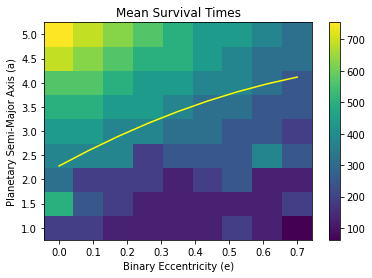

In [16]:
fig = plt.figure()
figure = np.reshape(mapping, [9,9])
plt.pcolormesh(e_bin,a_plan, figure.T, shading='auto')
plt.title('Mean Survival Times')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Planetary Semi-Major Axis (a)')
a_bin = 2.278 + 3.824*e_bin - 1.71*(e_bin**2)
plt.plot(e_bin, a_bin, color='yellow')

plt.colorbar()

Text(0, 0.5, 'Energy Error')

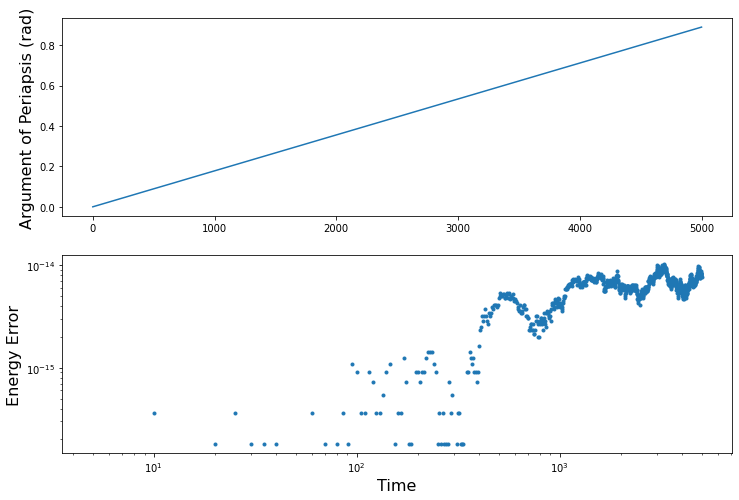

In [26]:
""" Including Tides"""
""" Question 1 """

import reboundx as rx

def getsim():
    sim = rb.Simulation()
    sim.units = ('yr', 'AU', 'Msun')
    sim.add(m=1, r=0.1, hash="Binary 1")
    sim.add(m=1, r=0.1, a=1, e= 0.1, hash="Binary 2", f=np.random.rand()*2*np.pi)
    sim.move_to_com()
    rebx = rx.Extras(sim)
    tides = rebx.load_force("tides_constant_time_lag")
    rebx.add_force(tides)
    # stop simulation when the binaries collide
    
    return sim4, rebx, tides

sim, rebx, tides = getsim()
ps = sim.particles
ps[0].params["tctl_k1"] = 0.25
# tau is zero for now as it's not specified

H0 = sim.calculate_energy() + rebx.tides_constant_time_lag_potential(tides)
tmax = 5000
Nout=1000

pomega, Eerr = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0,tmax,Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    pomega[i] = ps[1].pomega
    H = sim.calculate_energy() + rebx.tides_constant_time_lag_potential(tides)
    Eerr[i] = abs((H-H0)/H0)
    
fig, axarr = plt.subplots(nrows=2, figsize=(12,8))
axarr[0].plot(times, pomega)
axarr[0].set_ylabel("Argument of Periapsis (rad)", fontsize=16)
axarr[1].plot(times, Eerr, '.')
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlabel('Time', fontsize=16)
axarr[1].set_ylabel('Energy Error', fontsize=16)

In [27]:
""" What happens to the binary orbit over time when tau is zero?"""
"""While tau  is equal to zero, the system is in a state of instantaneous equilibrium
 tides where total energy is conserved, although the pericenter (focus closess to the center of mass)
 will precess. The pericenter vs. time graph illustrates this, showing that over time the 
 argument of the periapsis monotoncally increases indicating that the direction of the periapse
 and consequently the apoapsis are changing. 
 So, over time the binary orbit will rotate about the center of mass
 as the periapsis precesses while the semi-major axis and the eccentricity
 remain constant.
 """ 

'While tau  is equal to zero, the system is in a state of instantaneous equilibrium\n tides where total energy is conserved, although the pericenter (focus closess to the center of mass)\n will precess. The pericenter vs. time graph illustrates this, showing that over time the \n argument of the periapsis monotoncally increases indicating that the direction of the periapse\n and consequently the apoapsis are changing. \n So, over time the binary orbit will rotate about the center of mass\n as the periapsis precesses while the semi-major axis and the eccentricity\n remain constant.\n '

In [28]:
sim, rebx, tides = getsim()
ps = sim.particles
ps[0].params["tctl_k1"] = 0.25
ps[0].params["tctl_tau"] = 1e-3
ps[0].params["Omega"] = 1e-5

tmax = 2.5e4
Nout= 1000

a, e = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
# to plot physical radius of the Sun

R0 = 0*times + ps[0].r

q = (ps[1].m/ps[0].m)
T = ps[0].r**3/sim.G/ps[0].m/ps[0].params["tctl_tau"]
apred = ps[0].r*((ps[1].a/ps[0].r)**8 - 48.*ps[0].params["tctl_k1"]*q*(1+q)*times/T)**(1./8.)

In [29]:
%%time
for i, time in enumerate(times):
    sim.integrate(time)
    a[i] = ps[1].a
    e[i] = ps[1].e

CPU times: user 48.5 s, sys: 0 ns, total: 48.5 s
Wall time: 48.5 s


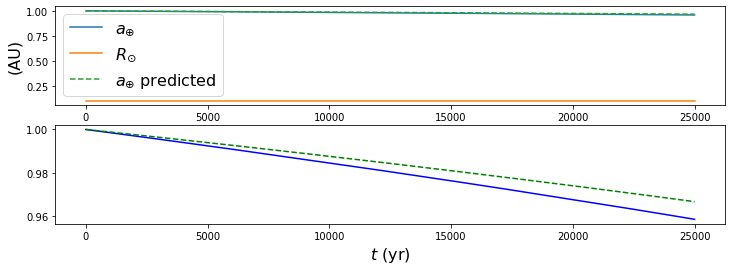

In [30]:
fig, ax = plt.subplots(2, figsize=(12,4))
ax[0].plot(times, a, label='$a_{\oplus}$')
ax[0].plot(times, R0, label='$R_{\odot}$')
ax[0].plot(times, apred, '--', label='$a_{\oplus}$ predicted')

plt.xlabel('$t$ (yr)', fontsize=16)
ax[0].set_ylabel('(AU)', fontsize=16)

ax[0].legend(fontsize=16, loc='best')

#ax[1].legend(fontsize=16, loc='best')
ax[1].plot(times, a, color='blue')
ax[1].plot(times, apred, '--', color='green')

Text(0.5, 1.0, 'Evolution of Eccentricity')

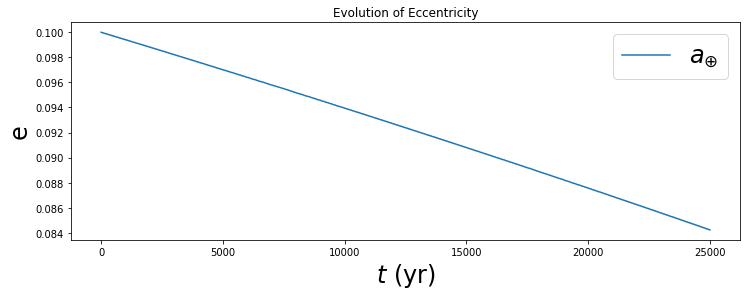

In [33]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(times, e, label='$a_{\oplus}$')
ax.set_xlabel('$t$ (yr)', fontsize=24)
ax.set_ylabel('e', fontsize=24)
ax.legend(fontsize=24, loc='best')
ax.set_title('Evolution of Eccentricity')

In [32]:
""" How does adding a non-zero tau value change the evolution of the orbital
parameters over time?"""
""" Both the semi major axis and the eccentricity decrease over time
when tau becomes a non-zero value."""

' Both the semi major axis and the eccentricity decrease over time\nwhen tau becomes a non-zero value.'

In [34]:
""" Observational Constraints on Stability"""
import emcee 

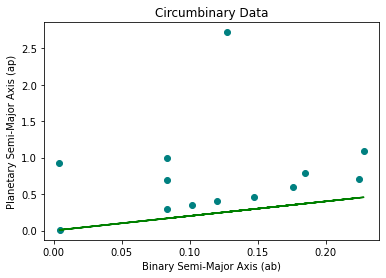

In [35]:
a_b = np.array([0.0043, 0.2243, 0.1276, 0.228,
               0.1762, 0.147, 0.1015, 0.0041,
               0.1848, 0.0836, 0.0836, 0.0836,
               0.12])
a_p = np.array([0.0088, 0.7048, 2.72, 1.0896,
               0.6035, 0.4644, 0.353, 0.92,
               0.7903, 0.2956, 1, 0.6992, 0.4])

plt.figure()
plt.title('Circumbinary Data')
plt.xlabel('Binary Semi-Major Axis (ab)')
plt.ylabel('Planetary Semi-Major Axis (ap)')
plt.scatter(a_b, a_p, color='teal')

# plot the line a_p = 2a_b
plt.plot(a_b, 2*a_b, color='green')

In [36]:
""" Yes there seems to be a pile-up of circumbinary planets
around a_p = 2a_b"""

' Yes there seems to be a pile-up of circumbinary planets\naround a_p = 2a_b'

In [37]:
a_i = a_p/a_b
a_c = 2*a_b

def log_prior(a_c):
    array = []
    for num in a_c:
        if 1 < num <= 5:
            array.append(0)
        array.append(-np.inf)
    return array

def log_likelihood(a_c, a_i):
    array = []
    for flt, num in zip(a_c, a_i):
        if num >= flt:
            array.append(0)
        else:
            array.append(-np.inf)
    return array

def log_probability(a_c, a_i):
    p_array = []
    lp = log_prior(a_c)
    ll = log_likelihood(a_c, a_i)

    for p,l in zip(lp,ll):
        if np.isfinite(lp) is False:
            p_array.append(-np.inf)
        p_array.append(p + l)
    return p_array

ac_in = 2.0
pos = ac_in + 1e-4 * np.random.randn(32,1)
nwalkers, ndim = pos.shape

In [38]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(a_i,))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:10<00:00, 495.62it/s]


State([[1.9186983 ]
 [1.1285313 ]
 [1.73931469]
 [1.20133424]
 [1.99536038]
 [1.38966201]
 [1.54682961]
 [1.86353659]
 [1.94518394]
 [1.04124409]
 [1.49376811]
 [1.35815495]
 [1.14099048]
 [1.39484324]
 [1.68450085]
 [2.01716811]
 [1.5295163 ]
 [1.32565984]
 [1.34666588]
 [1.54152206]
 [1.50769921]
 [1.44625073]
 [1.16645078]
 [1.45770249]
 [1.5942124 ]
 [1.07559919]
 [1.2676655 ]
 [1.34464902]
 [1.20731217]
 [1.26438663]
 [1.87827821]
 [1.57946361]], log_prob=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], blobs=[], random_state=('MT19937', array([  75134929,   24247408, 3904082482, 1668422540, 3269074108,
        199210540, 1539736851, 2738369565, 2954956995,  571770564,
        263163544, 2252517179, 3054298720, 3923154036,  597196675,
       3760705978, 2471051976,  292323028, 1263415909, 4238630902,
       2158495944, 2152651949,  433060179, 3672715556, 4269635660,
       3931311854, 3502560259, 1662682836, 1208374145, 3973040021

Text(0.5, 0, 'step number')

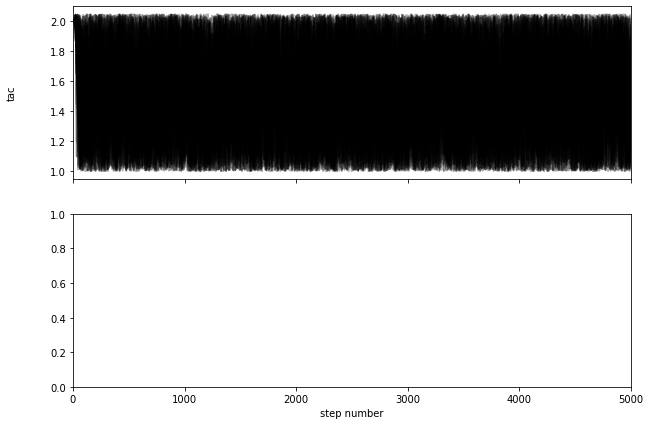

In [39]:
fig, axes = plt.subplots(2,figsize=(10,7), sharex = True)
samples = sampler.get_chain()
label = ["tac"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(label[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")

In [40]:
""" The values of ~ac (tac) seem to be constrained to values 
1.0 < tac < 2.0 based on the plot above."""

' The values of ~ac (tac) seem to be constrained to values \n1.0 < tac < 2.0 based on the plot above.'

In [41]:
tau = sampler.get_autocorr_time()
print(tau)

[27.03762107]


In [42]:
flat_samples = sampler.get_chain(discard=100, thin=13, flat=True)
print(flat_samples.shape)

(12032, 1)


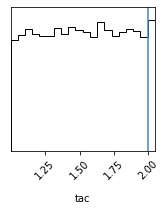

In [43]:
import corner

fig = corner.corner(flat_samples, labels=label, truths=[ac_in])

In [44]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [50, 75, 95])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], label)
    display(Math(txt))

<IPython.core.display.Math object>

In [45]:
""" Based on the statistical analysis, ~a_c is constrained to 1.790 based on the above observations.
My intuition had me believe that the value was 1.5 since the range seemed to be split equally, more or less, between 1.0 and 2.0.
Although, the statistical constraints using data gave me a consicise estimate in addition to accounting for errors in measurement."""

' Based on the statistical analysis, ~a_c is constrained to 1.790 based on the above observations.\nMy intuition had me believe that the value was 1.5 since the range seemed to be split equally, more or less, between 1.0 and 2.0.\nAlthough, the statistical constraints using data gave me a consicise estimate in addition to accounting for errors in measurement.'